# Credit Risk Prediction using Machine Learning

**Overview**
This project aims to predict whether a loan applicant is likely to be approved or rejected (credit risk prediction) based on demographic, financial, and credit history attributes.  

We perform data preprocessing, exploratory analysis, and build multiple machine learning models (Logistic Regression, Decision Tree, Random Forest) to classify loan applications. The models are evaluated using accuracy, confusion matrix, and ROC-AUC score.  

The project concludes with feature importance analysis to understand which factors contribute most to loan approval decisions, providing business insights useful for financial institutions to minimize loan defaults and improve decision-making.


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
)

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# For reproducibility
SEED = 42
np.random.seed(SEED)

In [18]:
data = pd.read_csv("CreditRisk.csv")

print("Shape of dataset:", data.shape)
data.head()

Shape of dataset: (981, 13)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [19]:
# Check missing values
print("Missing values:\n", data.isnull().sum())

data['Gender'] = data['Gender'].fillna('Male')
data['Married'] = data['Married'].fillna('Yes')
data['Dependents'] = data['Dependents'].fillna('0')
data['Self_Employed'] = data['Self_Employed'].fillna('No')
data['LoanAmount'] = data['LoanAmount'].fillna(data['LoanAmount'].median())
data['Loan_Amount_Term'] = data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].median())
data['Credit_History'] = data['Credit_History'].fillna(1.0)


print("Shape after preprocessing:", data.shape)
data.info()


Missing values:
 Loan_ID               0
Gender               24
Married               3
Dependents           25
Education             0
Self_Employed        55
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           27
Loan_Amount_Term     20
Credit_History       79
Property_Area         0
Loan_Status           0
dtype: int64
Shape after preprocessing: (981, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            981 non-null    object 
 1   Gender             981 non-null    object 
 2   Married            981 non-null    object 
 3   Dependents         981 non-null    object 
 4   Education          981 non-null    object 
 5   Self_Employed      981 non-null    object 
 6   ApplicantIncome    981 non-null    int64  
 7   CoapplicantIncome  981 non-null    float64
 8   LoanAmount         981 non-null

In [24]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
categorical_cols = data.select_dtypes(include="object").columns

for col in categorical_cols:
    data[col] = le.fit_transform(data[col].astype(str))
    
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            981 non-null    int32  
 1   Gender             981 non-null    int32  
 2   Married            981 non-null    int32  
 3   Dependents         981 non-null    int32  
 4   Education          981 non-null    int32  
 5   Self_Employed      981 non-null    int32  
 6   ApplicantIncome    981 non-null    int64  
 7   CoapplicantIncome  981 non-null    float64
 8   LoanAmount         981 non-null    float64
 9   Loan_Amount_Term   981 non-null    float64
 10  Credit_History     981 non-null    float64
 11  Property_Area      981 non-null    int32  
 12  Loan_Status        981 non-null    int32  
dtypes: float64(4), int32(8), int64(1)
memory usage: 69.1 KB


In [26]:
X = data.drop("Loan_Status", axis=1)
y = data["Loan_Status"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=SEED, stratify=y)

print("Train size:", X_train.shape, "Test size:", X_test.shape)

Train size: (735, 12) Test size: (246, 12)


Now creating Models

In [27]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=SEED),
    "Random Forest": RandomForestClassifier(random_state=SEED)
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    
    acc = accuracy_score(y_test, preds)
    cm = confusion_matrix(y_test, preds)
    report = classification_report(y_test, preds)
    
    print("="*40)
    print(name)
    print("Accuracy:", acc)
    print("Confusion Matrix:\n", cm)
    print("Classification Report:\n", report)
    
    results[name] = acc

Logistic Regression
Accuracy: 0.8780487804878049
Confusion Matrix:
 [[ 39  28]
 [  2 177]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.58      0.72        67
           1       0.86      0.99      0.92       179

    accuracy                           0.88       246
   macro avg       0.91      0.79      0.82       246
weighted avg       0.89      0.88      0.87       246

Decision Tree
Accuracy: 0.7764227642276422
Confusion Matrix:
 [[ 51  16]
 [ 39 140]]
Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.76      0.65        67
           1       0.90      0.78      0.84       179

    accuracy                           0.78       246
   macro avg       0.73      0.77      0.74       246
weighted avg       0.81      0.78      0.79       246

Random Forest
Accuracy: 0.8780487804878049
Confusion Matrix:
 [[ 43  24]
 [  6 173]]
Classification Report:
              

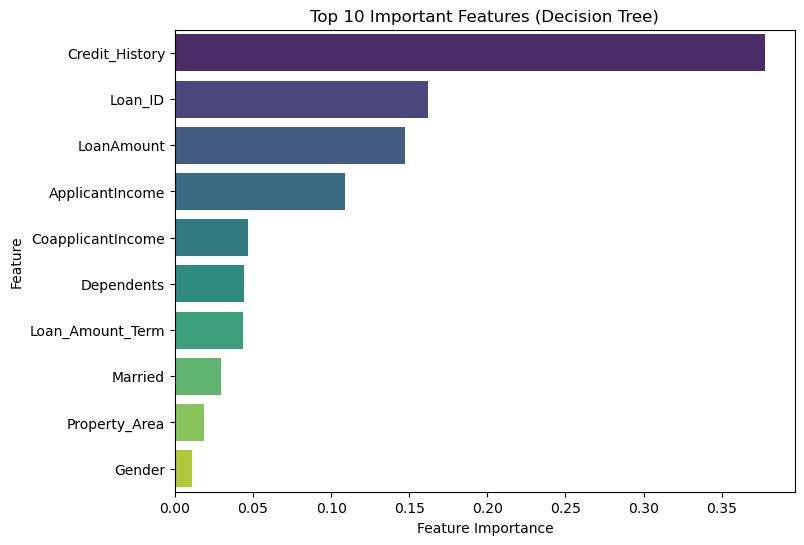

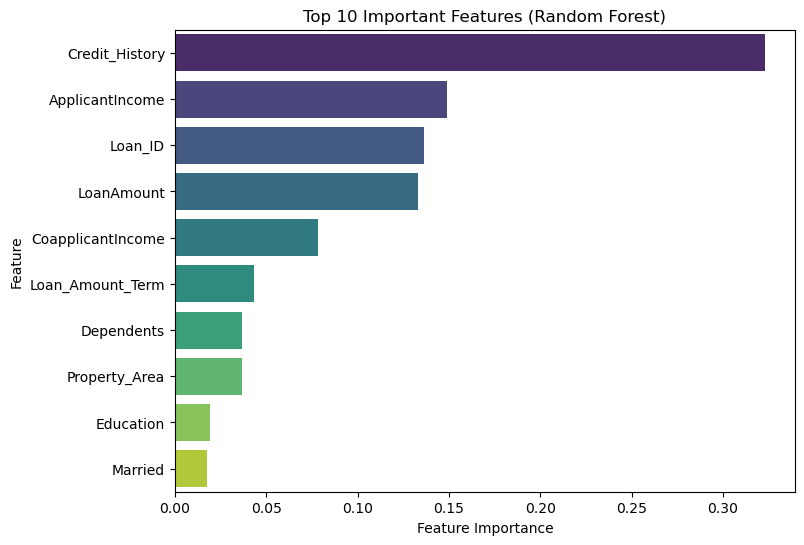

In [31]:
def plot_feature_importance(model, model_name, X_train):
    importances = pd.Series(model.feature_importances_, index=X_train.columns)
    top_features = importances.sort_values(ascending=False).head(10)

    plt.figure(figsize=(8,6))
    sns.barplot(x=top_features.values, y=top_features.index, palette="viridis")
    plt.title(f"Top 10 Important Features ({model_name})")
    plt.xlabel("Feature Importance")
    plt.ylabel("Feature")
    plt.show()

# Plot for Decision Tree
plot_feature_importance(models["Decision Tree"], "Decision Tree", X_train)

# Plot for Random Forest
plot_feature_importance(models["Random Forest"], "Random Forest", X_train)

# Conclusion

- We applied three machine learning models (Logistic Regression, Decision Tree, and Random Forest) to predict credit risk (loan approval).
- Logistic Regression and Random Forest both achieved an accuracy of ~88% and performed better than Decision Tree (~77%).
- Among the models, Random Forest provided the most balanced performance across precision, recall, and F1-score.
- Feature importance analysis (tree-based models) showed that **Credit_History, ApplicantIncome, LoanAmount, and Education** were key predictors of loan approval.
- Business insight: Such models can assist banks and financial institutions in making faster, data-driven loan decisions, reducing default risk, and improving customer targeting.